In [129]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.preprocessing import PolynomialFeatures

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [128]:
#importando libreria pandas alias pd
import pandas as pd
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder
#datatime sirve para poder trabajar con fechas
from datetime import datetime

In [ ]:
#conectamos con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#cargamos el dataset nota:"skiprows=1" omite l aprimera fila por el encabezado
data=pd.read_csv('drive/MyDrive/laboratorios_IA/.ford.csv',delimiter=',',skiprows=0)

In [ ]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


mostramos la informacion

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


vamos a ordenar las columnas para poder resolver mejor las prdicciones

In [ ]:
#lista con el nuevo orden de la columnas
nuevo_orden_columnas=['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'price']

#reordena las columnas segun el nuevo orden
data=data[nuevo_orden_columnas]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17966 non-null  int64  
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
# variables categoricas
columnas_categoricas=data.select_dtypes(include=['object']).columns

# variables fechas
columnas_fechas=data.select_dtypes(include=['datetime64']).columns

In [ ]:
# conversion de frases o palabras a numeros para su processamiento
for columna in columnas_categoricas:
  le=LabelEncoder()
  data[columna]=le.fit_transform(data[columna])

In [ ]:
# fechas a numeros
for columna in columnas_fechas:
  data[columna] = pd.to_numeric(data[columna].map(datetime.timestamp))

In [ ]:
# mostramos los objetos convertidos
print(data)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize  \
0          5  2017             0    15944         4  150  57.7         1.0   
1          6  2018             1     9083         4  150  57.7         1.0   
2          6  2017             1    12456         4  150  57.7         1.0   
3          5  2019             1    10460         4  145  40.3         1.5   
4          5  2019             0     1482         4  145  48.7         1.0   
...      ...   ...           ...      ...       ...  ...   ...         ...   
17961      0  2017             1    16700         4  150  47.1         1.4   
17962      0  2014             1    40700         4   30  57.7         1.0   
17963      6  2015             1     7010         0   20  67.3         1.6   
17964     11  2018             1     5007         4  145  57.7         1.2   
17965     23  2015             1     5007         4   22  57.7         1.0   

       price  
0      12000  
1      14000  
2      13000  
3  

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  int64  
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  int64  
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  int64  
 5   tax           17966 non-null  int64  
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


In [ ]:
# Lectura de Datos
# y es la octava columna ya que es la columna de precios
X = data.iloc[:, :8]
y = data.iloc[:, 8]
m = y.size

In [ ]:
print(X)
print('*'*25)
# esta es la y
print("es las y")
print(y)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
*************************
es las y
0        12000
1        14000
2        

In [141]:
# funcion para realizar una normalizacion de los datos
def NormalizarCaracteistica(x):
  #copia de los datos de entrada
  x_norm=x.copy()
  #inicializa vectores mu y sigma con cero
  mu=np.mean(x.shape[1])
  sigma=np.zeros(x.shape[1])


  #calcula la medida y la desviacion estandar de cada caracteristica
  mu=np.mean(x,axis=0)
  sigma=np.std(x,axis=0)


  #realizamos la normalizacion de caracteristicas
  x_norm=(x-mu)/sigma

  return x_norm,mu,sigma


In [ ]:
# se llama a NormalizarCaracteristica con los datos cargados
x_norm,mu,sigma= NormalizarCaracteistica(X)

print(X)
print("media calculada: ", mu)
print("desviacion estandar calculada :", sigma)
print(x_norm)

       model  year  transmission  mileage  fuelType  tax   mpg  engineSize
0          5  2017             0    15944         4  150  57.7         1.0
1          6  2018             1     9083         4  150  57.7         1.0
2          6  2017             1    12456         4  150  57.7         1.0
3          5  2019             1    10460         4  145  40.3         1.5
4          5  2019             0     1482         4  145  48.7         1.0
...      ...   ...           ...      ...       ...  ...   ...         ...
17961      0  2017             1    16700         4  150  47.1         1.4
17962      0  2014             1    40700         4   30  57.7         1.0
17963      6  2015             1     7010         0   20  67.3         1.6
17964     11  2018             1     5007         4  145  57.7         1.2
17965     23  2015             1     5007         4   22  57.7         1.0

[17966 rows x 8 columns]
media calculada:  model               6.848547
year             2016.86647

In [ ]:
# añade el termino de interseccion a x
# columna de unos para Xo
X=np.concatenate([np.ones((m,1)),x_norm], axis=1)

In [ ]:
print(X)

[[ 1.         -0.46069913  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.55286624 ...  0.59135805 -0.02044162
  -0.81138621]
 [ 1.         -0.21147687  0.06512772 ...  0.59135805 -0.02044162
  -0.81138621]
 ...
 [ 1.         -0.21147687 -0.91034931 ... -1.50505332  0.92766777
   0.57636151]
 [ 1.          1.03463446  0.55286624 ...  0.51072684 -0.02044162
  -0.34880364]
 [ 1.          4.02530164 -0.91034931 ... -1.47280084 -0.02044162
  -0.81138621]]


In [ ]:
#definiendo la funcion de costo
def computarCostoMulti(X, y, theta):
    # Inicializa algunos valores útiles
    num_de_ej_de_entrenamiento = y.shape[0]  # número de ejemplos de entrenamiento

    valor_de_funcion_de_costo = 0  # Valor de la función de costo inicializado a 0

    # Calcula las predicciones del modelo (hipótesis)
    hipotesis = np.dot(X, theta)

    # Calcula la función de costo
    num_de_ej_de_entrenamiento = (1 / (2 * valor_de_funcion_de_costo)) * np.sum(np.square(np.dot(X, theta) - y))

    return num_de_ej_de_entrenamiento

In [ ]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y)
    list_historia_fun_de_costo = []  # Inicializa list_historia_fun_de_costo como una lista vacía

    for i in range(num_iters):
        # Calcula el error entre la predicción y el valor real
        error = np.dot(X, theta) - y

        # Actualiza los parámetros theta mediante el descenso por el gradiente
        theta = theta - (alpha / m) * np.dot(X.T, error)

        # Calcula el valor de la función de costo actual
        costo = np.sum(error ** 2) / (2 * m)
        list_historia_fun_de_costo.append(costo)

    return theta, list_historia_fun_de_costo


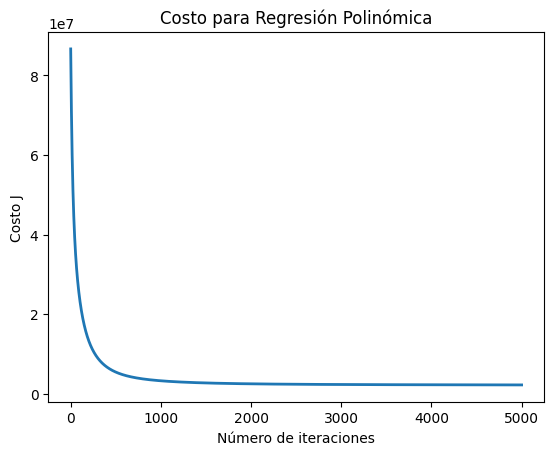

In [136]:
# Para regresión polinómica
poly = PolynomialFeatures(degree=2)  # Puedes ajustar el grado según sea necesario
X_poly = poly.fit_transform(X)  # Transforma las características originales en características polinómicas
# Entrena el modelo de regresión lineal sobre las características polinómicas
theta_poly = np.zeros(X_poly.shape[1])
theta_poly, list_costo_poly = gradientDescentMulti(X_poly, y, theta_poly, alpha, num_iters)

# Grafica el costo para la regresión polinómica
pyplot.figure()
pyplot.plot(np.arange(len(list_costo_poly)), list_costo_poly, lw=2)
pyplot.title('Costo para Regresión Polinómica')
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.show()


Theta calculado por el descenso por el gradiente: [12197.00271509   208.46449922  2187.91320105   -92.00443493
 -1364.4948486   -734.49263869   205.24559627 -1037.6962092
  1608.44683847]
El valor predecido  0  es (usando el descenso por el gradiente): 11340.5944
El valor predecido  1  es (usando el descenso por el gradiente): 26792.3765
El valor predecido  2  es (usando el descenso por el gradiente): 38848.6221
El valor predecido  3  es (usando el descenso por el gradiente): 61191.0217
El valor predecido  4  es (usando el descenso por el gradiente): 78934.0124
El valor predecido  5  es (usando el descenso por el gradiente): 89393.6176
El valor predecido  6  es (usando el descenso por el gradiente): 1038137.3342
El valor predecido  7  es (usando el descenso por el gradiente): 1097835.5732
El valor predecido  8  es (usando el descenso por el gradiente): 1222093.4166
El valor predecido  9  es (usando el descenso por el gradiente): 139693.4947
El valor predecido  10  es (usando el descens

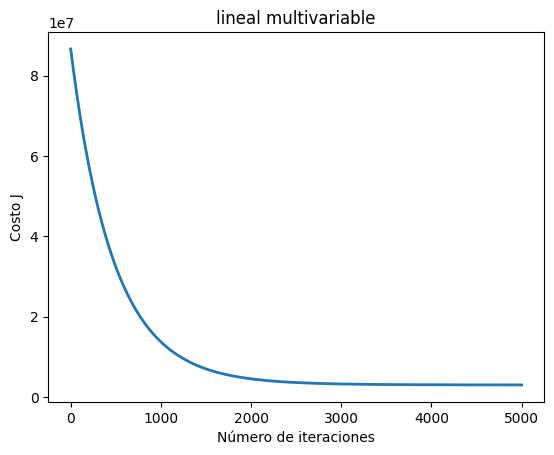

In [134]:
# Elegir algun valor para alpha
alpha = 0.001     # Tasa de aprendizaje, tamaño de pasos que se dan en direccion del gradiente
num_iters = 5000     # Veces que se repite el proceso de actualización de parámetros en el descenso por el gradiente

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(9)  # Ajusta el tamaño de theta para 9 características
theta, list_historia_fun_de_costo = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(list_historia_fun_de_costo)), list_historia_fun_de_costo, lw=2)
pyplot.title("lineal multivariable")
pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un ford con distintas características      (preciciones)
X_predicciones = [
    [1, 5, 2017, 0, 15944, 4, 150, 57.7, 1.0],
    [2,5, 2014, 1, 9200, 0, 155, 48.7,2],
    [3, 6, 2018, 1, 10460, 4, 150, 57.7, 1.5],
    [5, 5, 2017, 0, 12456, 4, 20, 67.3, 1.6],
    [6, 8, 2019, 0, 13500, 4.5, 165, 52.1, 2],
    [7, 5, 2016, 1, 9800, 0, 140, 45.6, 1.8],
    [85, 0, 2014, 1, 11800, 4, 160, 49.9, 2.3],
    [90, 23, 2015, 0, 10000, 4, 150, 55.2, 1.4],
    [100, 11, 2013, 1, 8800, 4, 135, 43.8, 2.5],
    [11, 4, 2018, 1, 11000, 0, 155, 47.2, 1.7],
    [12, 6, 2017, 0, 9500, 4, 145, 44.5, 2.1],
    [13, 11, 2016, 1, 10200, 4, 150, 48.8, 1.9],
    [1004, 23, 2018, 0, 12500, 4, 160, 51.3, 2.2],
    [15000, 0, 2014, 1, 8500, 0, 140, 42.7, 2.4]

    ]# Ajusta el tamaño de X_array para 9 características

for i, x_prediccion in enumerate(X_predicciones):
  x_prediccion[1:9]=(x_prediccion[1:9] -mu)/sigma
  price=np.dot(x_prediccion, theta)
  print('El valor predecido ',i,' es (usando el descenso por el gradiente): {:.4f}'.format(price))